In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/curated/procesed_data.csv')

In [4]:
df

,distance_to_CBD,time_to_CBD,distance_to_station,time_to_station,year,Average_household_size,Average_num_psns_per_bedroom,Median_age_persons,Tot_P_P,average_quarterly_count,...,gdp_cbd/inflation/beach,gdp_cbd/inflation/cbd,gpd/inflation/airbnb,average_weekly_rent/inflation/household_size,A Crimes against the person/per_person,B Property and deception offences/per_person,C Drug offences/per_person,D Public order and security offences/per_person,E Justice procedures offences/per_person,F Other offences/per_person
0,11.733250,8.640331,8.364811,6.249589,2016,1.335001,0.587787,3.583519,9.129239,7.184629,...,2.218034,8.091102,0.000000,101.439296,0.004329,0.035585,0.000976,0.000434,0.001950,0.000000
1,8.668471,6.496322,8.401423,6.326686,2016,1.131402,0.641854,3.713572,9.691284,7.235619,...,0.557813,6.559741,5.087235,258.721923,0.009476,0.068453,0.002408,0.004565,0.004010,0.000124
2,10.534025,7.665097,7.165416,5.091908,2016,1.308333,0.641854,3.713572,6.911382,7.703685,...,1.656180,7.491732,3.237196,133.413229,0.015832,0.071208,0.005966,0.002988,0.005966,0.000000
3,8.818571,6.732806,7.338758,5.348059,2016,1.064711,0.693147,3.526361,9.471396,7.750830,...,0.967022,6.634701,5.016899,217.719386,0.015288,0.092140,0.007826,0.018243,0.010650,0.000077
4,10.234567,7.623837,8.514610,6.418365,2016,1.435085,0.641854,3.496508,10.818061,8.427925,...,0.963222,7.342088,4.963106,114.169996,0.004498,0.021819,0.000721,0.000521,0.001642,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,10.433104,7.561330,9.065211,6.660703,2023,1.324419,0.587787,3.732896,8.713516,6.925350,...,1.572493,7.439305,3.453281,151.326927,0.006063,0.030754,0.005737,0.001971,0.005573,0.000164
3428,10.887543,8.083236,8.744823,6.402415,2023,1.350667,0.565314,3.832980,6.860873,6.644766,...,1.786340,7.666411,3.356279,136.574732,0.003142,0.007317,0.002096,0.001049,0.003142,0.000000
3429,11.152245,8.484009,10.343966,7.694803,2023,1.223775,0.587787,3.867026,8.941310,6.644766,...,2.073525,7.798706,4.829452,162.642938,0.010028,0.018415,0.000654,0.002223,0.008991,0.000131
3430,10.764562,8.073185,8.133235,6.112354,2023,1.360977,0.565314,3.723281,7.254319,6.644766,...,1.745955,7.604948,2.968096,134.697416,0.009157,0.007754,0.000000,0.000000,0.001414,0.000000


In [5]:
# Step 1: Sort the DataFrame by SAL_CODE and year
df = df.sort_values(by=['SAL_CODE', 'year'])

# Step 2: Calculate the yearly growth
df['yearly_growth'] = df.groupby('SAL_CODE')["average_weekly_rent/inflation/household_size"].pct_change()
df['previous_growth'] = df.groupby('SAL_CODE')['average_weekly_rent/inflation/household_size'].pct_change().shift(1)

df['previous_rent'] = df.groupby('SAL_CODE')["average_weekly_rent/inflation/household_size"].shift(1)

df.head(10)


,distance_to_CBD,time_to_CBD,distance_to_station,time_to_station,year,Average_household_size,Average_num_psns_per_bedroom,Median_age_persons,Tot_P_P,average_quarterly_count,...,average_weekly_rent/inflation/household_size,A Crimes against the person/per_person,B Property and deception offences/per_person,C Drug offences/per_person,D Public order and security offences/per_person,E Justice procedures offences/per_person,F Other offences/per_person,yearly_growth,previous_growth,previous_rent
144,8.370270,6.464744,6.779240,5.107157,2016,1.131402,0.741937,3.496508,9.010058,7.641924,...,210.533210,0.008517,0.092150,0.003902,0.006698,0.007790,0.000000,NaN,NaN,NaN
506,8.370270,6.464744,6.779240,5.107157,2017,1.118415,0.732368,3.502550,9.031907,7.547238,...,216.609944,0.012474,0.099488,0.004771,0.005484,0.009282,0.000000,0.028864,NaN,210.533210
1085,8.370270,6.464744,6.779240,5.107157,2018,1.105257,0.722706,3.508556,9.053289,7.508513,...,225.523555,0.013252,0.086059,0.004437,0.006067,0.009782,0.000000,0.041151,0.028864,216.609944
1573,8.370270,6.464744,6.779240,5.107157,2019,1.091923,0.712950,3.514526,9.074223,7.545390,...,234.752927,0.011281,0.105299,0.005258,0.006169,0.007649,0.000229,0.040924,0.041151,225.523555
1822,8.370270,6.464744,6.779240,5.107157,2020,1.078410,0.703098,3.520461,9.094727,7.585154,...,227.361358,0.016258,0.098294,0.009386,0.008941,0.011053,0.000225,-0.031487,0.040924,234.752927
2563,8.370270,6.464744,6.779240,5.107157,2021,1.064711,0.693147,3.526361,9.114820,7.802822,...,206.459571,0.012683,0.078993,0.005815,0.007673,0.008546,0.013986,-0.091932,-0.031487,227.361358
2830,8.370270,6.464744,6.779240,5.107157,2022,1.050822,0.683097,3.532226,9.134517,7.761000,...,215.864220,0.016584,0.067980,0.006345,0.004521,0.010411,0.002263,0.045552,-0.091932,206.459571
3171,8.370270,6.464744,6.779240,5.107157,2023,1.036737,0.672944,3.538057,9.153834,7.566958,...,240.070087,0.014811,0.075493,0.007170,0.006014,0.008850,0.000212,0.112135,0.045552,215.864220
227,9.313159,7.105868,7.801432,5.471850,2016,1.360977,0.641854,3.713572,8.268219,7.360581,...,135.693035,0.003586,0.025837,0.000513,0.000770,0.001795,0.000000,NaN,0.112135,NaN
766,9.313159,7.105868,7.801432,5.471850,2017,1.355835,0.631272,3.718438,8.269654,7.380412,...,139.676534,0.004857,0.022048,0.000768,0.001792,0.004091,0.000000,0.029357,NaN,135.693035


In [6]:
df[df['SAL_CODE'] == '21640']

,distance_to_CBD,time_to_CBD,distance_to_station,time_to_station,year,Average_household_size,Average_num_psns_per_bedroom,Median_age_persons,Tot_P_P,average_quarterly_count,...,average_weekly_rent/inflation/household_size,A Crimes against the person/per_person,B Property and deception offences/per_person,C Drug offences/per_person,D Public order and security offences/per_person,E Justice procedures offences/per_person,F Other offences/per_person,yearly_growth,previous_growth,previous_rent


In [7]:
df.columns

Index(['distance_to_CBD', 'time_to_CBD', 'distance_to_station',
       'time_to_station', 'year', 'Average_household_size',
       'Average_num_psns_per_bedroom', 'Median_age_persons', 'Tot_P_P',
       'average_quarterly_count', 'SAL_CODE', 'median_score', 'average_price',
       'proximity_to_beach', 'airbnb_count', 'commercial density',
       'education density', 'food_establishments density',
       'healthcare density', 'industrial density', 'public_transport density',
       'recreation density', 'residential density', 'shopping density',
       'pop density', 'interest_rate', 'Median_tot_fam_inc_weekly/inflation',
       'Median_tot_hhd_inc_weekly/inflation',
       'Median_tot_prsnl_inc_weekly/inflation', 'gdp_cbd/inflation/beach',
       'gdp_cbd/inflation/cbd', 'gpd/inflation/airbnb',
       'average_weekly_rent/inflation/household_size',
       'A Crimes against the person/per_person',
       'B Property and deception offences/per_person',
       'C Drug offences/per_person

In [8]:
temporal_variables = ['average_quarterly_count', 'commercial', 'education',
       'food_establishments', 'healthcare', 'industrial', 'public_transport',
       'recreation', 'residential', 'shopping', 'SAL_CODE', 'median_score',
       'average_price','interest_rate','Median_tot_fam_inc_weekly/inflation',
       'Median_tot_hhd_inc_weekly/inflation',
       'Median_tot_prsnl_inc_weekly/inflation',
       'average_weekly_rent/inflation/household_size','A Crimes against the person/per_person',
       'B Property and deception offences/per_person',
       'C Drug offences/per_person',
       'D Public order and security offences/per_person',
       'E Justice procedures offences/per_person',
       'F Other offences/per_person', 'yearly_growth', 'previous_growth',
       'previous_rent']

In [9]:
# remove Nan for the first year
df = df.dropna()


In [10]:
target = 'yearly_growth'

In [11]:
X = df[temporal_variables].drop(columns = target)
y = df[target]

KeyError: "['commercial', 'education', 'food_establishments', 'healthcare', 'industrial', 'public_transport', 'recreation', 'residential', 'shopping'] not in index"

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Define the independent variables (X) and the dependent variable (y)
X = df.drop(columns=['year','SAL_CODE','yearly_growth'])

y = df['yearly_growth']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict the yearly growth
y_pred = model.predict(X)
print("Predicted yearly growth:", y_pred)

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y, y_pred)
print("R^2:", r2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)
# Initialize the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X, y)

# Predict the yearly growth
y_pred_rf = rf_model.predict(X)
print("Predicted yearly growth (Random Forest):", y_pred_rf)

# Calculate R^2 (coefficient of determination)
r2_rf = r2_score(y, y_pred_rf)
print("R^2 (Random Forest):", r2_rf)

# Calculate RMSE (Root Mean Squared Error)
rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))
print("RMSE (Random Forest):", rmse_rf)

Coefficients: [ 2.94387693e+01  1.93461959e-03  9.97079159e-05 -7.05984166e-05
 -3.63511496e-04  2.71191063e-04  1.03692962e-04  6.26435284e-05
 -4.42814342e-04  2.35962006e-04  9.84758677e-05 -7.72660826e-05
 -2.53921787e-04  5.28513885e-05  1.90186694e-05 -2.80668312e-05
  5.99434972e-04 -4.00779482e-02  1.17694283e-02  2.90300163e-03
  9.70134566e-04 -1.21681330e-03  7.43687100e-06 -4.12870208e-04
 -8.24735853e-05 -1.84823821e-04  9.84991964e-05  3.40296546e-04
 -2.80388407e-04 -6.90385841e-05  3.16620140e-05  3.83778521e-03
 -1.79533434e-05  3.76474898e-04  1.67479699e-03 -1.52572297e-03
  1.60000058e-02 -1.02249263e-02  2.94438654e+01 -2.47569985e-04
 -2.94376860e+01  5.34854848e-03  1.61463898e-01 -1.04556187e-02
  1.30806742e-02 -2.94675776e-01  1.29096778e-02  4.83291933e-01
  3.08961878e-02 -5.45941410e-03]
Intercept: -0.08659885808662672
Predicted yearly growth: [ 0.04984594  0.04976326 -0.04314028 ... -0.04064552 -0.05193199
  0.02409272]
R^2: 0.9553032309706793
RMSE: 0.0080

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict the yearly growth on the test set
y_pred_rf_test = rf_model.predict(X_test)

# Calculate R^2 (coefficient of determination) on the test set
r2_rf_test = r2_score(y_test, y_pred_rf_test)
print("R^2 (Random Forest) on test set:", r2_rf_test)

# Calculate RMSE (Root Mean Squared Error) on the test set
rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
print("RMSE (Random Forest) on test set:", rmse_rf_test)

R^2 (Random Forest) on test set: 0.7588048328803205
RMSE (Random Forest) on test set: 0.017595379591065944


In [21]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())
print("Standard deviation of R^2 scores:", cv_scores.std())

Cross-validation R^2 scores: [0.81031052 0.82257097 0.77010699 0.80134152 0.77901833]
Mean R^2 score: 0.7966696664761523
Standard deviation of R^2 scores: 0.019472656587703373


In [22]:
target = 'yearly_growth'

In [23]:
# Add the 'year' column to the independent variables (X)
data = df.drop(columns=['SAL_CODE'])

In [24]:
# remove factors which do not change over time


In [25]:
from sklearn.model_selection import TimeSeriesSplit

In [26]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the TimeSeriesSplit with the number of splits equal to the number of years minus one
years = sorted(df['year'].unique())
n_splits = len(years) - 1
tscv = TimeSeriesSplit(n_splits=n_splits)

# order the data by year
df = df.sort_values(by='year')

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['train_years', 'test_year', 'mse', 'r2'])

# Iterate through the splits
for train_index, test_index in tscv.split(df):
    train_years = df.iloc[train_index]['year'].unique()
    test_year = df.iloc[test_index]['year'].unique()[0]
    
    # Split the data into training and testing sets
    X_train, X_test = df.iloc[train_index].drop(columns=[target, 'year']), df.iloc[test_index].drop(columns=[target, 'year'])
    y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]
    
    # Initialize and train the model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)

# Display the results
print(results)

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_96110/1224975906.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_96110/1224975906.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_96110/1224975906.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignor

                      train_years test_year       mse        r2
0                          [2018]      2019  0.000360 -0.194948
1                    [2018, 2019]      2020  0.000955 -1.474084
2              [2018, 2019, 2020]      2021  0.002208  0.294755
3        [2018, 2019, 2020, 2021]      2022  0.000814  0.264140
4  [2018, 2019, 2020, 2021, 2022]      2023  0.002497 -0.285221


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_96110/1224975906.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


In [27]:
# rf model all predictions
rf_predictions = rf_model.predict(X)

# make DF with SAL_CODE and yearly growth and predictions
df_predictions = df[['SAL_CODE', 'yearly_growth','year']]
df_predictions['predictions'] = rf_predictions

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_96110/360859767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions['predictions'] = rf_predictions


In [28]:
df_predictions

,SAL_CODE,yearly_growth,year,predictions
1085,20002,0.041151,2018,0.032591
1059,20600,0.002844,2018,0.032976
869,22009,0.021274,2018,-0.021534
959,20613,0.028391,2018,-0.105213
975,22006,0.000226,2018,0.023921
...,...,...,...,...
3206,20566,0.061683,2023,0.029400
3358,22042,0.061272,2023,-0.012545
3139,22047,0.015315,2023,-0.043459
3118,22050,0.043855,2023,-0.043370


In [29]:
# get gpd
import geopandas as gpd

In [30]:
SAL = gpd.read_file("../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")


In [31]:
# Check the column names to ensure 'SAL_CODE' exists
print(SAL.columns)

# If the column name is different, use the correct column name
# For example, if the correct column name is 'SAL_CODE21'
# Remove any non-integer values
SAL = SAL[SAL['SAL_CODE21'].apply(lambda x: str(x).isdigit())]

# Convert to integer
SAL['SAL_CODE21'] = SAL['SAL_CODE21'].astype(int)


Index(['SAL_CODE21', 'SAL_NAME21', 'STE_CODE21', 'STE_NAME21', 'AUS_CODE21',
       'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')


In [32]:
# merge the predictions with the gpd
SAL = SAL.merge(df_predictions, left_on='SAL_CODE21', right_on='SAL_CODE')

In [33]:
import matplotlib.pyplot as plt

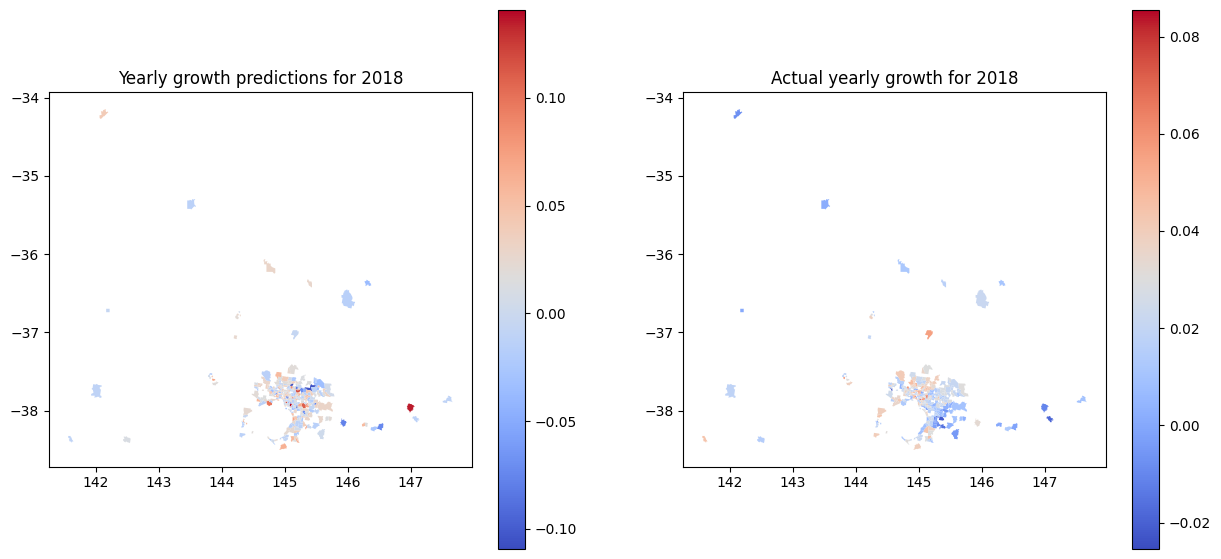

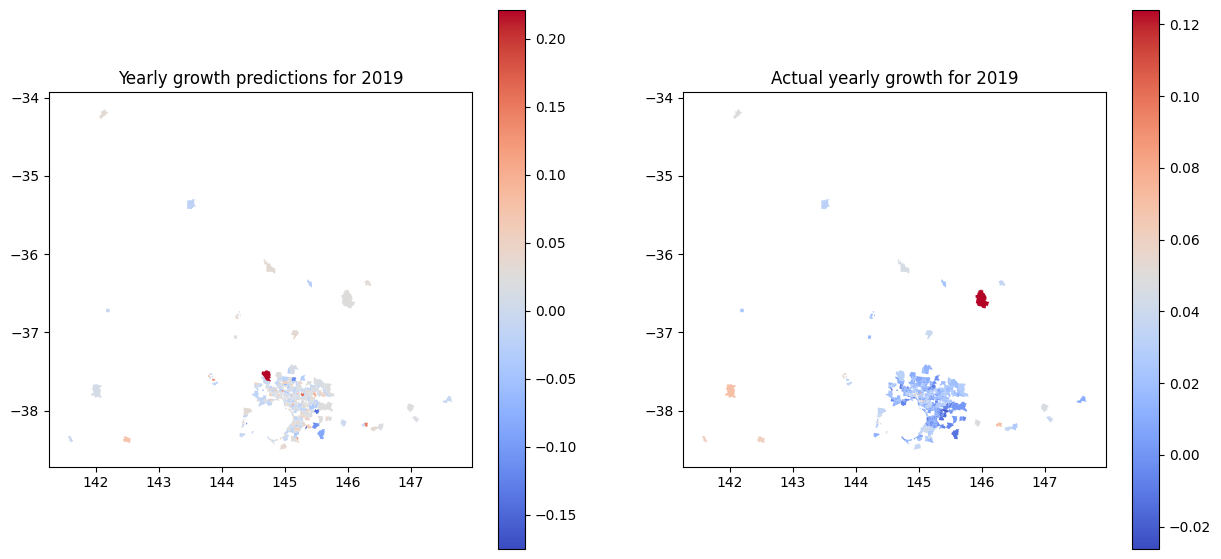

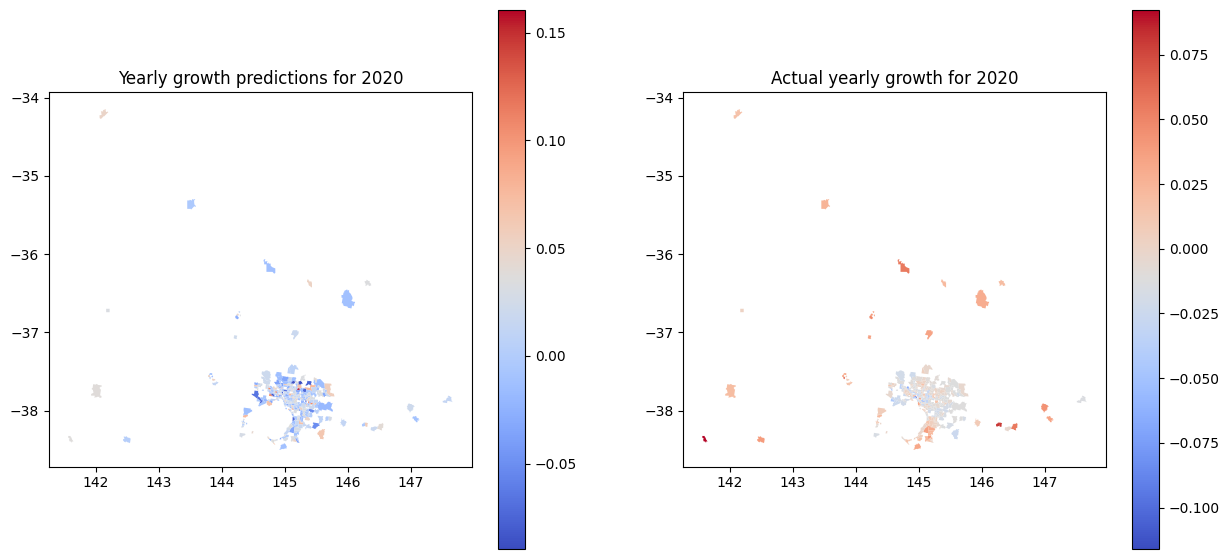

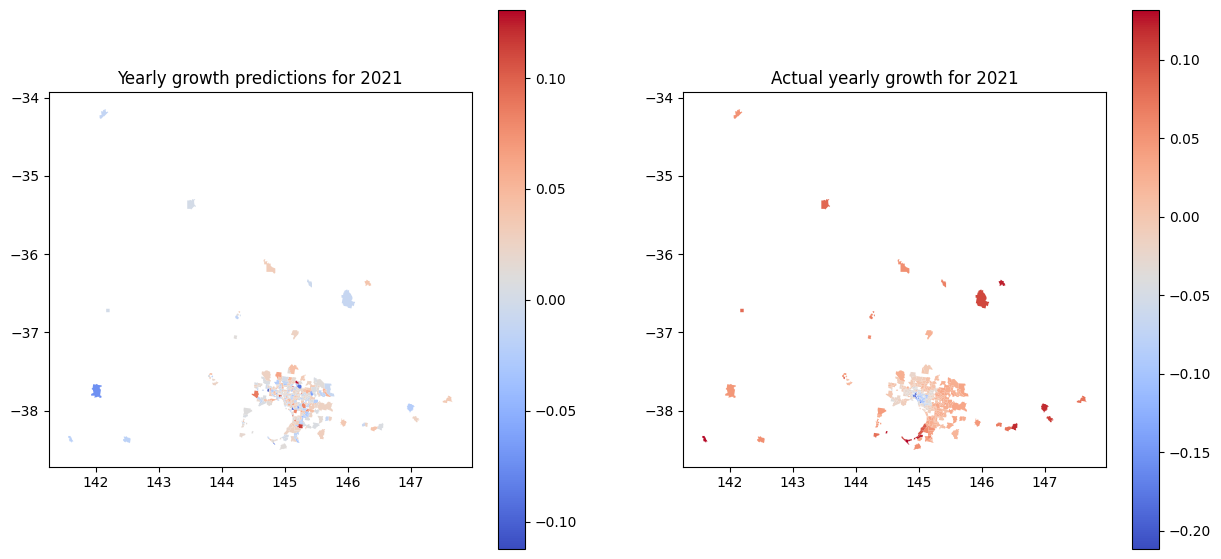

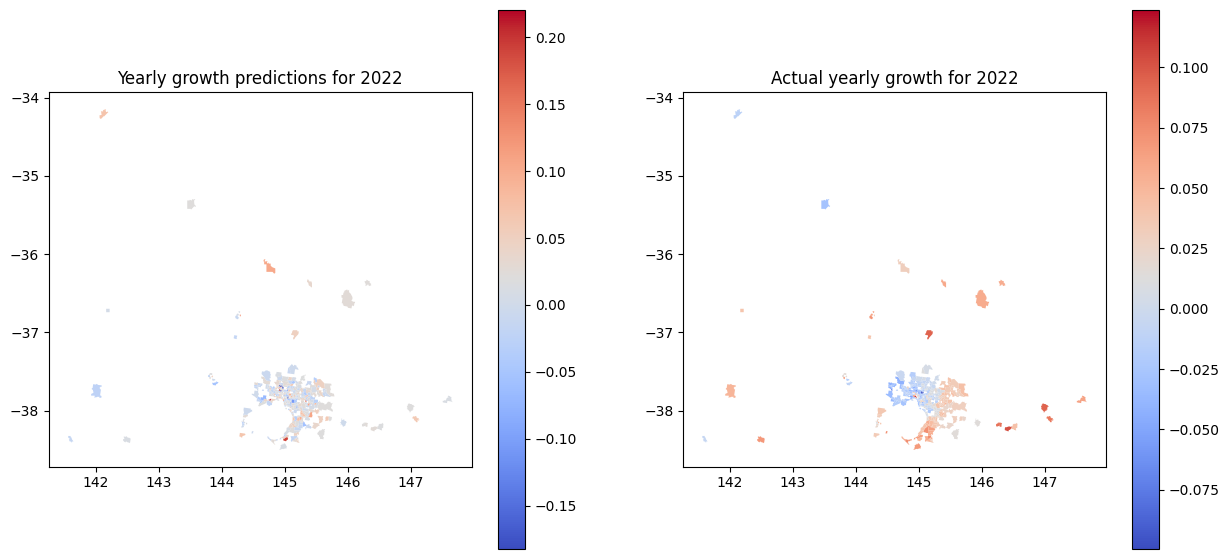

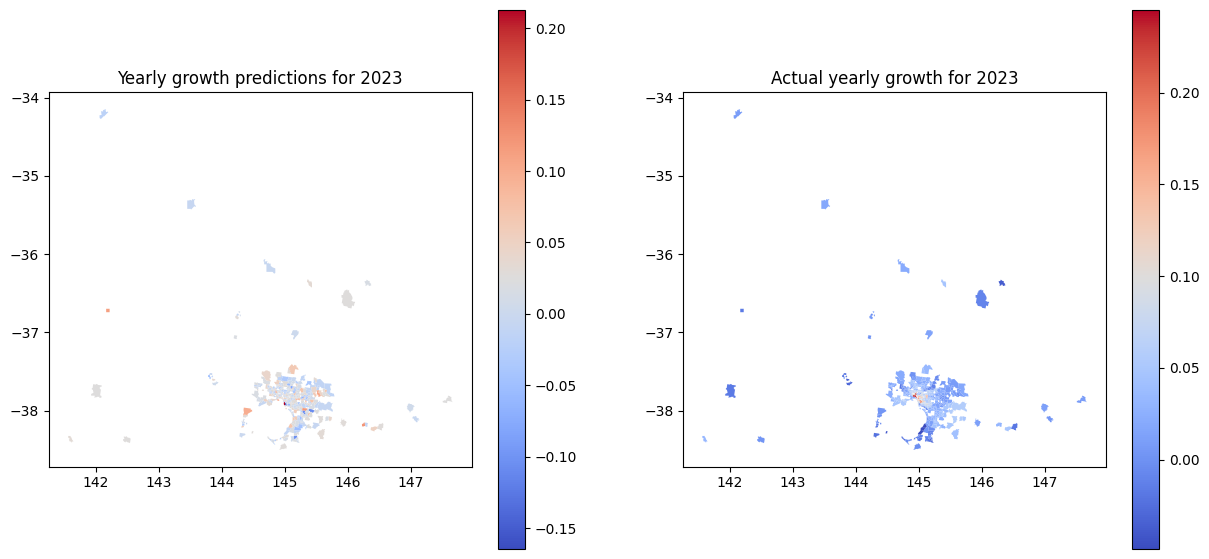

In [34]:
# get graph for every year
for year in range(2018, 2024):
    SAL_year = SAL[SAL['year'] == year]
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    SAL_year.plot(column='predictions', cmap='coolwarm', legend=True, ax=axes[0])
    axes[0].set_title(f"Yearly growth predictions for {year}")
    
    SAL_year.plot(column='yearly_growth', cmap='coolwarm', legend=True, ax=axes[1])
    axes[1].set_title(f"Actual yearly growth for {year}")
    
    plt.savefig(f'../plots/yearly_growth_{year}.png')
    plt.show()


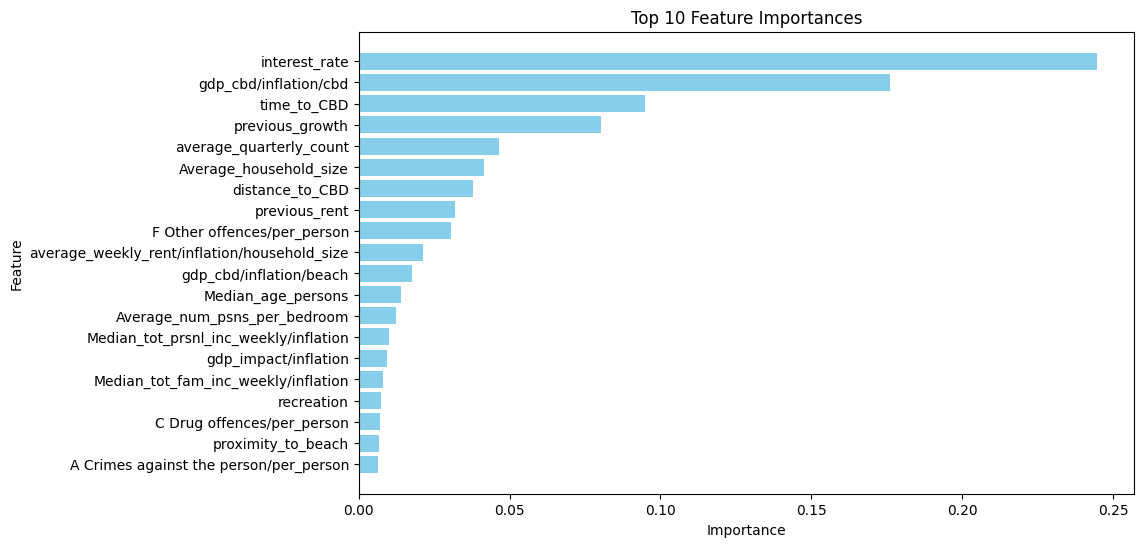

In [35]:
# get feeature importance
importances = rf_model.feature_importances_
# BEGIN: Get top 10 features and plot
import matplotlib.pyplot as plt

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Get the top 10 features
top_10_features = feature_importances_df.head(20)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['feature'], top_10_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()
# END: Get top 10 features and plot